## Intro

Start by importing pandas into the python enviornment

Click on the next 'cell' and hit `Shift`+`Enter` to execute the code within.

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

[import xlsx](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

Now import the excel document using the library you just imported and sneak a peak at its contents.



You will need to drag and drop the file into the virtual directory (left hand side -> folder icon). This drag and drop feature is only permitted once a (any) code cell has been ran.

In [ ]:
df = pd.read_excel('xport6.xlsx', sheet_name='Sheet1')  
df.head()

,Refuge,Region,Comment
0,Bald Knob National Wildlife Refuge,IR1,Condition of the road system from when it was ...
1,Bald Knob National Wildlife Refuge,IR1,One complaint – can't ride a 4-wheeler in to f...
2,Bald Knob National Wildlife Refuge,IR1,Not very many handicap trails.
3,Bald Knob National Wildlife Refuge,IR1,Would like to see more area cleared on the roa...
4,Bald Knob National Wildlife Refuge,IR1,"Many of the information signs, especially the ..."


Heres a whole bunch of things to import all at once.

If comments aren't in-lined they may be explained later or irrelevant 

In [ ]:
import numpy as np # linear algebra
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
from PIL import Image #use to open the image
from wordcloud import ImageColorGenerator
import numpy as np
import itertools 

How many records, & columns were in that dataset, again?

In [ ]:
df.shape

(2286, 3)

Oh. Right...

I guess we only really need the Refuge/Comment Pairs



In [ ]:
data = df[['Comment', 'Refuge']]
data.head()

,Comment,Refuge
0,Condition of the road system from when it was ...,Bald Knob National Wildlife Refuge
1,One complaint – can't ride a 4-wheeler in to f...,Bald Knob National Wildlife Refuge
2,Not very many handicap trails.,Bald Knob National Wildlife Refuge
3,Would like to see more area cleared on the roa...,Bald Knob National Wildlife Refuge
4,"Many of the information signs, especially the ...",Bald Knob National Wildlife Refuge


Nice! What Refuges are there?

In [ ]:
# data['Comment'].unique() # I commented this one out. Feel free to undo

## Word Analysis

Lets take those comments and look into them a bit. Start by importing whats needed for this section.

In [ ]:
import nltk
nltk.download('stopwords')
import itertools
import collections
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


This next block will clean up the data. descriptions are given above most lines of code.

In [ ]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

def cleanText(sentences):
  # Strip URLS
  all_text_no_urls = [remove_url(sentence) for sentence in sentences ]
  # ['Not very many handicap trails', etc...]
  
  # Create a List of Words for each Sentence
  words_in_sentence = [sentence.lower().split() for sentence in all_text_no_urls]
  # [['not', 'very', 'many', 'handicap', 'trails'], [...] ]
  
  # Remove stop words from each list of words
  stop_words = set(stopwords.words('english'))
  tweets_nsw = [[word for word in tweet_words if not word in stop_words] for tweet_words in words_in_sentence]
  # [['many', 'handicap', 'trails'], [...] ]

  # Lets take another look
  collection_words = ['remove', 'these', 'words']
  tweets_nsw_nc = [[w for w in word if not w in collection_words] for word in tweets_nsw]
  # [['many', 'handicap', 'trails'], [...] ] => no change! 

  # Flatten list of words in clean tweets
  all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))
  # ['many', 'handicap', 'trails', 'would', 'like', 'see', 'area', 'cleared', 'roadsides', 'bank', 'fishing', 'access']

  # Create counter of words in clean tweets
  counts_nsw_nc = collections.Counter(all_words_nsw_nc)
  return counts_nsw_nc


#lower_case = [word.lower() for word in df_new['text']]

cleaned = cleanText( data['Comment']  )

Now that we have our clean text. lets see those word counts!

In [ ]:
cleanedd = pd.DataFrame(cleaned.most_common(20000), columns=['words', 'count']) #.most_common(300), columns=['words', 'count'])
cleanedd.head()

,words,count
0,refuge,684
1,road,551
2,parking,399
3,would,383
4,roads,354


Aweomse. Lets save it to a csv

In [ ]:
cleanedd.to_csv('NaomiKeywordCount.csv')

And plot these word counts horizontally as well.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 60))

# Plot horizontal bar graph
cleanedd.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

## Simple Word Cloud

We found this function online. Missing attribution.

It will draw a wordcloud for you if you give it data and color specifics.

This next function will display our wordcloud

In [ ]:
def show(img, s1, s2):
    plt.figure(figsize=(s1,s2))
    plt.clf() # Clear Figure
    plt.imshow(img, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    #fig.set_figwidth(14) # set width
    #fig.set_figheight(12) # set height 

Lets make two.

Start by Downloading the Fish and Wildlife logo

In [ ]:
%%capture
!wget https://www.hydroreview.com/wp-content/uploads/content/dam/rew/migrated/galleries/2011/12/clarified-interpretation-could-change-u-s-fish-and-wildlife-policy/8170-clarified-interpretation-could-change-u-s-fish-and-wildlife-policy.jpg

This function will list content in your current directory. You should see the jpg here. Take note.

In [ ]:
ls

8170-clarified-interpretation-could-change-u-s-fish-and-wildlife-policy.jpg
NaomiKeywordCount.csv
sample_data/
xport3.xlsx


Now 'Open' that image into a variable. then convert that picture in an array of array of numbers where each array in the array represents a RGB pixel of the picture, and each number in the sub array is the R G and B value 

In [ ]:
img = Image.open('8170-clarified-interpretation-could-change-u-s-fish-and-wildlife-policy.jpg')
mask = np.array(img) #created an array mask

You'll now need to retrieve the 'poppins' font face from google (if thats the font face you want to use. Be sure to upload it the same way you did the excel sheet.

If you uploaded the raw file, you can upzip it using these two terminal commands

In [ ]:
%%capture
!sudo apt install unzip
!unzip Poppins.zip

Then store the font face in a variable as well

In [ ]:
import os
fontpath = os.path.join('Poppins-Bold.ttf') 

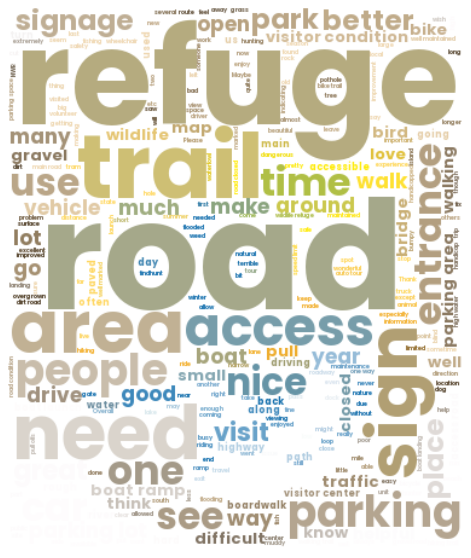

In [ ]:
# Create a wordcloud
cloud = WordCloud(mask= mask, stopwords=STOPWORDS, background_color='white', font_path=fontpath, max_words=300, width=300, height=200 ).generate(' '.join(data['Comment']))
# Give the font a color mask using the photo itself.
coloredMaskCloud = cloud.recolor(color_func=ImageColorGenerator(mask))
show(coloredMaskCloud, 10, 10)

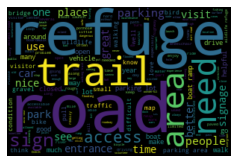

In [ ]:
cloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=300, width=300, height=200 ).generate(' '.join(flatlist))
show(cloud, 4, 4)

Very Pretty. Now lets save em.

In [ ]:
[Save Fig](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)

## Bigram!

And this bit gets the most common bigrams

In [ ]:
# Let’s look at some bigrams!

from nltk import bigrams

# Create list of lists containing bigrams in txt
terms_bigram = [list(bigrams(txt)) for txt in ' '.join( data['Comment'] ).split() ]

# View bigrams for the first txt
terms_bigram[0]
# Flatten list of bigrams in clean txt
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(10000)
bigram_df = pd.DataFrame(bigram_counts.most_common(10000), columns=['bigram', 'count'])  
bigram_df.to_csv('wordCountBiGrams')

Lets take a peak

In [ ]:
bigram_df

,bigram,count
0,"(t, h)",5052
1,"(h, e)",4899
2,"(r, e)",4216
3,"(i, n)",4033
4,"(e, r)",3537
...,...,...
1208,"((, C)",1
1209,"(U, -)",1
1210,"(9, 9)",1
1211,"(i, u)",1


## Network Graph

We can save those bigrams as a csv, but also it'd be very nice to see how each of these bigrams relate to eachother. We didnt actually get to finish this so it'd be best to skip over this entire section.

In [ ]:
import networkx as nx
g = nx.from_pandas_edgelist(bigram_df, source = 'cuisine', target = 'bigrams')
pos = nx.circular_layout(g)
cmap = plt.cm.RdYlGn
colors = [n for n in range(len(g.nodes()))]
nx.draw_networkx(g, pos, node_size = combined['id'].values * 4, edge_color = 'grey', cmap = cmap, node_color = colors, font_size = 15, width = 3)
plt.title("Top 25 Bigrams for Mexican and Italian cuisine", fontsize = 40)
plt.gcf().set_size_inches(60, 60)
plt.show()

In [ ]:
nx.from_pandas_edgelist(bigram_df, 0, "b", ["weight", "cost"])

In [ ]:
import networkx as nx
G = nx.Graph() 
for index, row in bigram_df.iterrows():
    # print(row[['bigram'][0][0], row['bigram'][0][0])
    G.add_edge( row[['bigram'][0], row['bigram'][1], weightrow['count'] )
    

In [ ]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_5(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    #####calculates the degree of each node
    d = nx.degree(H)
    #####creates list of nodes and a list their degrees that will be used later for their sizes
    nodelist, node_sizes = zip(*d)

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           #####the node size will be now based on its degree
                           node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part5" + corr_direction + ".png", format="PNG")
    plt.show() 


In [ ]:
create_corr_network_5(bigram_df, corr_direction="positive",min_correlation=0.7)

## NLP Sentiment Analysis

And this is where we can run sentiment analysis

This line will install the library

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

This one will import it and create a utility variable that we can use later.

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification")

This is the function that will create the predictions and return any label with a greater than 50% probability of being applicable to the comment.

In [ ]:
labels = [ 'road', 'dust', 'pavement', 'parking', 'trail', 'path', 'boat', 'access', 
 'accessible', 'accessibility', 'ramps', 'available', 'handicap', 'disability', 
 'wheelchair', 'mobility', 'signs', 'signage', 'map', 'information', 'directions', 
 'confusing', 'need', 'request', 'better', 'repair', 'maintain', 'pothole', 'condition', 
 'status', 'improve', 'clean', 'trash', 'upset', 'happy', 'concern', 'enterence', 
 'wildlife', 'area', 'open', 'closed', 'bike', 'bicycle', 'walk', 'hike', 'car', 
 'vehicle', 'kayak', 'ATV', 'wheels', 'difficult', 'water', 'flood', 'visitor', 
 'traffic', 'problem', 'speed', 'unsafe', 'safe', 'saftey', 'danger', 'slip', 
 'fish', 'hunt', 'temporal', 'seasonal', 'volunteer', 'age', 'elderly'
]

In [ ]:
#application of NLP to the entire data set (adding scores columm to the dataset)
def predict( sequence ):
  result = classifier(sequence, labels, multi_class=True)
  keywords = []
  for i in range(len( result['labels'] )):
    if( result['scores'][i] > .5 ):
      keywords.append( result['labels'][i] )
      # keywords.append( t['labels'][i] + ' : '+ str( round( t['scores'][i], 2) ) )
      # keywords.append( t['labels'][i] + ' : '+ str( round( t['scores'][i], 2) ) )
  return keywords

We call the function here and store the results into a csv for each Refuge.

In [ ]:
import json 
pred0 = {
 'Road': ['dust', 'pavement', 'car', 'highway', 'condition', 'loop', 'route', 'lane'],
 'Trail': ['bike', 'bicycle', 'walk', 'hike', 'path', 'condition', 'boardwalk'],
 'Parking': ['pothole', 'pavement', 'drive', 'condition', 'spot', 'space'],
 'Boat': ['kayak', 'launch', 'water', 'condition'],
 'Access': ['visitor', 'accessible', 'accessibility', 'ramps', 'available', 'handicap', 'disability', 'wheelchair', 'mobility', 'age', 'elderly'],
 'Sign': ['signage', 'map', 'information', 'directions'],
 'Safety': ['safety', 'speed', 'unsafe', 'safe', 'danger', 'vehicle', 'traffic'],
 'Maintain': ['flood', 'pothole', 'condition', 'status', 'improve', 'repair'],
}
pred1 = ['Positive', 'Negative']
pred2 = ['Concern', 'Upset', 'Problem', 'Need', 'Difficult', 'Happy', 'love', 'Satisfied', 'Accessible', 'Available']

In [ ]:
list(pred0.keys())

['Road', 'Trail', 'Parking', 'Boat', 'Access', 'Sign', 'Safety', 'Maintain']

In [ ]:
for i in range(3):
  print(i)

0
1
2


In [ ]:
#application of NLP to the entire data set (adding scores columm to the dataset)
def predict( sequence ):
  result = classifier(sequence, list(pred0.keys()), multi_class=False)
  keywords = []
  subkeywords1 = []
  subkeywords2 = []
  # for i in range(len( result['labels'] )):
  # Save the top 3 keywords
  for i in range(3): 
    keywords.append( result['labels'][i] )
    # Get keywords for the top 2 
    if (i==0):
      subKeys = classifier(sequence, pred0[result['labels'][i]], multi_class=False) 
      for x in range(2): 
        subkeywords1.append( subKeys['labels'][x] ) 
    if (i==1):
      subKeys = classifier(sequence, pred0[result['labels'][i]], multi_class=False) 
      for x in range(2): 
        subkeywords2.append( subKeys['labels'][x] )

  posneg = classifier(sequence, pred1, multi_class=False)['labels'][0]

  sentiment = classifier(sequence, pred2, multi_class=False)
  upsetHappywords = []
  for i in range(3): upsetHappywords.append( sentiment['labels'][i] )
  # print( (keywords, posneg, upsetHappywords, subkeywords1, subkeywords2) )
  return keywords, posneg, upsetHappywords, subkeywords1, subkeywords2

for refuge in data['Refuge'].unique()[51:]:
  classifyThis = data[ data['Refuge'] == refuge ]
  new_df = classifyThis.copy()
  print( new_df.size )
  print( refuge )
  new_df[['themes', 'posorneg', 'posnegwords', 'kw1', 'kw2']]  = new_df.apply(lambda x: predict( x['Comment'] ) , axis=1, result_type="expand")
  new_df.to_csv(refuge+'_labeled.csv')
new_df.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

And thats the end! Everything below is scrap note and tests.

In [ ]:
This is the manual list we used to create our labels.
ROAD --- road -> dust -> pavement
parking
TRAIL --- trail -> path
boat
ACCESS --- access -> accessible -> accessibility -> ramps -> available -> handicap -> disability -> wheelchair
mobility
SIGN ---- signs -> signage -> map -> information -> directions -> confusing
NEED ---- need -> request -> better
MAINTAIN ----  maintain -> pothole -> condition -> status -> improve -> repair
clean -> trash
upset -> happy -> concern
enterence
wildlife ?
area
open -> closed
bike -> bicycle
walk -> hike
car -> vehicle
kayak
ATV -> 4-wheelers
difficult
water -> flood
visitor
traffic
problem
speed
unsafe -> safe -> saftey -> danger -> slip
fish -> hunt
temporal -> seasonal
volunteer
age -> elderly

In [ ]:
 ['road', 'dust', 'pavement', 'parking', 'trail', 'path', 'boat', 'access', 
 'accessible', 'accessibility', 'ramps', 'available', 'handicap', 'disability', 
 'wheelchair', 'mobility', 'signs', 'signage', 'map', 'information', 'directions', 
 'confusing', 'need', 'request', 'better', 'repair', 'maintain', 'pothole', 'condition', 
 'status', 'improve', 'clean', 'trash', 'upset', 'happy', 'concern', 'enterence', 
 'wildlife', 'area', 'open', 'closed', 'bike', 'bicycle', 'walk', 'hike', 'car', 
 'vehicle', 'kayak', 'ATV', 'wheels', 'difficult', 'water', 'flood', 'visitor', 
 'traffic', 'problem', 'speed', 'unsafe', 'safe', 'saftey', 'danger', 'slip', 
 'fish', 'hunt', 'temporal', 'seasonal', 'volunteer', 'age', 'elderly'
]

In [ ]:
t = classifier(new_df['Comment'][2], labels, multi_class=True)
t

In [ ]:
classifier(new_df['Comment'][3], labels, multi_class=True)

In [ ]:
keywords = []
for i in range(len( t['labels'] )):
  if( t['scores'][i] > .5 ):
    keywords.append( t['labels'][i] )
    # keywords.append( t['labels'][i] + ' : '+ str( round( t['scores'][i], 2) ) )
    # keywords.append( t['labels'][i] + ' : '+ str( round( t['scores'][i], 2) ) )
keywords

In [ ]:
classifier(new_df['Comment'][5], labels, multi_class=True)

In [ ]:
classifier(new_df['Comment'][7], labels, multi_class=True)

In [ ]:
new_df

In [ ]:
new_df['Comment'][0]

In [ ]:
new_df['score'].head()

In [ ]:
new_df[ new_df['score'] < .06 ]

In [ ]:
new_df['Comment'][96]

##
- Split pos neg, refuge, theme

- themes: We have a list but we need to flesh it out. We can do this by creating a wordcloud of the comments.

1. Pos Neg
- Create General/Pos/Neg WordCloud
2. Group by Theme
- Word analysis (Unique Counts/ NGrams Counts)
- 
3. Group by Refuge - Find Theme 





In [ ]:
data

In [ ]:
test = new_df[0:50].copy()

In [ ]:
test.head()

In [ ]:
testNeg = test[ test['score'] > .06 ]

for row in testNeg.iterrows():
  print( row[1][0] )
  print( '/n' )

In [ ]:
testPos = test[ test['score'] <= .06 ]
for row in testPos.iterrows():
  print( row[1][0] )
  print( '/n' )

In [ ]:
testPos.head()

In [ ]:
testPos.reset_index(inplace=True, drop=True)

In [ ]:
testPos.head()

In [ ]:
testPos['Comment'][0]